# Imports

In [1]:
## imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
root = os.path.expanduser('~')

# company_index='5'
# company_name='Amazon'
# img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/companies/'\
#             +f'{company_index}_{company_name}'
# img_path = root + '/Desktop/Paper/img'
# img_flag = False

# if not os.path.exists(img_path):
#     os.makedirs(img_path)
model_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/analysis2/models'
if not os.path.exists(model_path):
    os.makedirs(model_path)

ModuleNotFoundError: No module named 'pyLDAvis'

# Data Load

In [3]:
pc_flag = 'pro'

sentences = pd.\
read_csv(f'~/Desktop/workspace/indeed/Job-Satisfaction/data/prepx/{pc_flag}_doc_sampled_6_.csv')


# sentences = pd.\
# read_csv(f'~/Desktop/workspace/indeed/Job-Satisfaction/data/prepx/{pc_flag}_doc_all.csv')


sentences.shape

(43311, 15)

In [5]:
# display(sentences)
sents = sentences.Px_Texts.values
print(len(sents))
count = 0
for sent in sents[:5]:
    if (len(sent.split()) <= 0) :
        count += 1
print(count)
        
    


43311
0


# Tokenization

In [6]:
df = sentences.copy()

data_px = [sents.split() for sents in df.Px_Texts.values]
print(len(data_px))
# data_px = df['Px_Texts'].str.split().values
# data_px


43311


# Build Dictionary

In [7]:
# Create Dictionary
id2word = corpora.Dictionary(data_px) ##dictionary
print(len(id2word))
print(id2word)

# Create Corpus
texts = data_px 

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]  ##corpus

# View
print(corpus[:5])

12924
Dictionary(12924 unique tokens: ['benefit', 'discount', 'discount_health', 'health', 'health_benefit']...)
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1)], [(9, 1), (10, 1), (11, 1)], [(1, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(11, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]]


# LDA

In [11]:
def lda_viz(num_topics): 

    # %%time
    # Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
    num_topics = num_topics
    mallet_path = root + '/Downloads/mallet-2.0.8/bin/mallet' # update this path
    ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=500, random_seed=42)
    # %time ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=42)


    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamallet, texts=data_px, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)


    ##mallet model to lda model conversion
    optimal_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

    # %%time
    # Visualize the topics
    pyLDAvis.enable_notebook()
    # vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, mds='tsne')
    vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
    return vis
    # pyLDAvis.show(vis)

In [12]:
viz = lda_viz(22)
viz


Coherence Score:  0.41376357961435956


/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16     0.187227 -0.357516       1        1  4.673370
9      0.160965 -0.293931       2        1  4.657095
0      0.090369  0.047182       3        1  4.635751
4      0.146250 -0.181357       4        1  4.584689
11     0.098270  0.055771       5        1  4.571728
1      0.100300  0.056304       6        1  4.570081
15    -0.166133  0.004998       7        1  4.559885
3      0.084796  0.079729       8        1  4.559403
10     0.105476  0.087357       9        1  4.547854
2      0.120582  0.169979      10        1  4.529940
13     0.105452  0.035608      11        1  4.528467
8     -0.291812 -0.061536      12        1  4.521419
18     0.106918  0.091849      13        1  4.518968
17     0.117959  0.155012      14        1  4.518063
14     0.105297  0.086304      15        1  4.517204
19    -0.070932  0.037901      16        1  4.513115
21    -0.168397  0.002583      17        1  4.510540
20    -0.157486  0.005818      18        1  4.508288
6     -0.239656 -0.002494      19        1  4.502065
12     0.104990  0.076486      20        1  4.494852
5     -0.209823 -0.045591      21        1  4.494251
7     -0.330610 -0.050455      22        1  4.482973, topic_info=      Category         Freq                  Term        Total  loglift  \
22     Default  4942.000000                   pay  4942.000000  30.0000   
0      Default  8181.000000               benefit  8181.000000  29.0000   
31     Default  2703.000000                 peopl  2703.000000  28.0000   
40     Default  3185.000000                  free  3185.000000  27.0000   
11     Default  1924.000000                  hour  1924.000000  26.0000   
15     Default  2372.000000                 lunch  2372.000000  25.0000   
9      Default  1602.000000               flexibl  1602.000000  24.0000   
81     Default  1472.000000                 manag  1472.000000  23.0000   
25     Default  1734.000000               environ  1734.000000  22.0000   
156    Default  1423.000000                  time  1423.000000  21.0000   
1      Default  1240.000000              discount  1240.000000  20.0000   
32     Default  1188.000000               employe  1188.000000  19.0000   
16     Default  1175.000000                cowork  1175.000000  18.0000   
78     Default  1089.000000            free_lunch  1089.000000  17.0000   
150    Default  1030.000000              opportun  1030.000000  16.0000   
82     Default  1016.000000               schedul  1016.000000  15.0000   
5      Default  1023.000000                 break  1023.000000  14.0000   
180    Default   982.000000                 learn   982.000000  13.0000   
362    Default   978.000000           pay_benefit   978.000000  12.0000   
379    Default   982.000000                  home   982.000000  11.0000   
332    Default   960.000000                 excel   960.000000  10.0000   
212    Default   874.000000                balanc   874.000000   9.0000   
334    Default   841.000000                  paid   841.000000   8.0000   
133    Default   827.000000                  nice   827.000000   7.0000   
107    Default   842.000000                   lot   842.000000   6.0000   
297    Default   796.000000                 train   796.000000   5.0000   
660    Default   780.000000               compens   780.000000   4.0000   
35     Default   766.000000                   fun   766.000000   3.0000   
66     Default   756.000000              friendli   756.000000   2.0000   
75     Default   757.000000                custom   757.000000   1.0000   
...        ...          ...                   ...          ...      ...   
1682   Topic22    18.628783          benefit_perk    18.628783   3.1049   
1771   Topic22    16.558918    free_lunch_benefit    16.558918   3.1049   
3744   Topic22    15.523986           pto_benefit    15.523986   3.1049   
2966   Topic22    13.454121  excel_benefit_packag    13.4541

# Finding Optimal Model

In [13]:
#parameter tuning (finding the best model)
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    mallet_path = root + '/Downloads/mallet-2.0.8/bin/mallet' # update this path
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, 
                                                  random_seed=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [14]:
#  Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_px, start=8, limit=30, step=2)

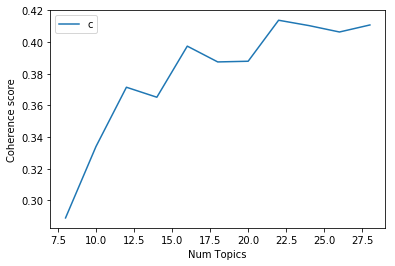

In [15]:
# Show graph
limit=30; start=8; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 8  has Coherence Value of 0.2889
Num Topics = 10  has Coherence Value of 0.334
Num Topics = 12  has Coherence Value of 0.3714
Num Topics = 14  has Coherence Value of 0.3651
Num Topics = 16  has Coherence Value of 0.3973
Num Topics = 18  has Coherence Value of 0.3874
Num Topics = 20  has Coherence Value of 0.3878
Num Topics = 22  has Coherence Value of 0.4137
Num Topics = 24  has Coherence Value of 0.4103
Num Topics = 26  has Coherence Value of 0.4063
Num Topics = 28  has Coherence Value of 0.4107


# Optimal Model Visualization

In [17]:
vis = lda_viz(22)
vis


Coherence Score:  0.41376357961435956


/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16     0.187227 -0.357516       1        1  4.673363
9      0.160965 -0.293931       2        1  4.657101
0      0.090369  0.047182       3        1  4.635748
4      0.146250 -0.181357       4        1  4.584692
11     0.098270  0.055771       5        1  4.571728
1      0.100300  0.056304       6        1  4.570081
15    -0.166133  0.004998       7        1  4.559885
3      0.084796  0.079729       8        1  4.559402
10     0.105476  0.087357       9        1  4.547855
2      0.120582  0.169979      10        1  4.529942
13     0.105452  0.035608      11        1  4.528468
8     -0.291812 -0.061536      12        1  4.521422
18     0.106918  0.091849      13        1  4.518964
17     0.117959  0.155012      14        1  4.518066
14     0.105297  0.086304      15        1  4.517203
19    -0.070932  0.037901      16        1  4.513114
21    -0.168397  0.002583      17        1  4.510543
20    -0.157486  0.005818      18        1  4.508290
6     -0.239656 -0.002494      19        1  4.502069
12     0.104990  0.076486      20        1  4.494849
5     -0.209823 -0.045591      21        1  4.494247
7     -0.330610 -0.050455      22        1  4.482967, topic_info=      Category         Freq                  Term        Total  loglift  \
22     Default  4942.000000                   pay  4942.000000  30.0000   
0      Default  8181.000000               benefit  8181.000000  29.0000   
31     Default  2703.000000                 peopl  2703.000000  28.0000   
40     Default  3185.000000                  free  3185.000000  27.0000   
11     Default  1924.000000                  hour  1924.000000  26.0000   
15     Default  2372.000000                 lunch  2372.000000  25.0000   
9      Default  1602.000000               flexibl  1602.000000  24.0000   
81     Default  1472.000000                 manag  1472.000000  23.0000   
25     Default  1734.000000               environ  1734.000000  22.0000   
156    Default  1423.000000                  time  1423.000000  21.0000   
1      Default  1240.000000              discount  1240.000000  20.0000   
32     Default  1188.000000               employe  1188.000000  19.0000   
16     Default  1175.000000                cowork  1175.000000  18.0000   
78     Default  1089.000000            free_lunch  1089.000000  17.0000   
150    Default  1030.000000              opportun  1030.000000  16.0000   
82     Default  1016.000000               schedul  1016.000000  15.0000   
5      Default  1023.000000                 break  1023.000000  14.0000   
180    Default   982.000000                 learn   982.000000  13.0000   
362    Default   978.000000           pay_benefit   978.000000  12.0000   
379    Default   982.000000                  home   982.000000  11.0000   
332    Default   960.000000                 excel   960.000000  10.0000   
212    Default   874.000000                balanc   874.000000   9.0000   
334    Default   841.000000                  paid   841.000000   8.0000   
133    Default   827.000000                  nice   827.000000   7.0000   
107    Default   842.000000                   lot   842.000000   6.0000   
297    Default   796.000000                 train   796.000000   5.0000   
660    Default   780.000000               compens   780.000000   4.0000   
35     Default   766.000000                   fun   766.000000   3.0000   
66     Default   756.000000              friendli   756.000000   2.0000   
75     Default   757.000000                custom   757.000000   1.0000   
...        ...          ...                   ...          ...      ...   
1682   Topic22    18.628761          benefit_perk    18.628761   3.1049   
1771   Topic22    16.558898    free_lunch_benefit    16.558898   3.1049   
3744   Topic22    15.523967           pto_benefit    15.523967   3.1049   
2966   Topic22    13.454105  excel_benefit_packag    13.4541

In [19]:
vis = lda_viz(16)
vis


Coherence Score:  0.4005069593669359


/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13    -0.128857 -0.341253       1        1  6.371513
14    -0.074449  0.023506       2        1  6.348429
6     -0.130817 -0.330196       3        1  6.326133
12    -0.085881  0.049291       4        1  6.262385
2     -0.066229  0.033217       5        1  6.260261
8     -0.113864  0.170057       6        1  6.254334
5      0.268371 -0.003175       7        1  6.241083
0     -0.085685  0.003816       8        1  6.233098
11     0.136761  0.000822       9        1  6.225250
15    -0.110017  0.131276      10        1  6.223499
4     -0.029571  0.042963      11        1  6.222088
9     -0.101329  0.073047      12        1  6.218957
10    -0.068541  0.023079      13        1  6.213683
1     -0.114878  0.165609      14        1  6.212612
3      0.342902 -0.020628      15        1  6.205129
7      0.362086 -0.021432      16        1  6.181544, topic_info=      Category         Freq                  Term        Total  loglift  \
0      Default  7969.000000               benefit  7969.000000  30.0000   
22     Default  4940.000000                   pay  4940.000000  29.0000   
31     Default  2696.000000                 peopl  2696.000000  28.0000   
40     Default  3277.000000                  free  3277.000000  27.0000   
15     Default  2365.000000                 lunch  2365.000000  26.0000   
11     Default  1951.000000                  hour  1951.000000  25.0000   
25     Default  1755.000000               environ  1755.000000  24.0000   
9      Default  1605.000000               flexibl  1605.000000  23.0000   
156    Default  1425.000000                  time  1425.000000  22.0000   
1      Default  1272.000000              discount  1272.000000  21.0000   
32     Default  1218.000000               employe  1218.000000  20.0000   
16     Default  1196.000000                cowork  1196.000000  19.0000   
78     Default  1136.000000            free_lunch  1136.000000  18.0000   
150    Default  1074.000000              opportun  1074.000000  17.0000   
180    Default  1042.000000                 learn  1042.000000  16.0000   
82     Default  1018.000000               schedul  1018.000000  15.0000   
362    Default   993.000000           pay_benefit   993.000000  14.0000   
379    Default   998.000000                  home   998.000000  13.0000   
81     Default  1504.000000                 manag  1504.000000  12.0000   
5      Default   963.000000                 break   963.000000  11.0000   
332    Default   913.000000                 excel   913.000000  10.0000   
212    Default   859.000000                balanc   859.000000   9.0000   
334    Default   841.000000                  paid   841.000000   8.0000   
133    Default   818.000000                  nice   818.000000   7.0000   
107    Default   892.000000                   lot   892.000000   6.0000   
35     Default   789.000000                   fun   789.000000   5.0000   
297    Default   778.000000                 train   778.000000   4.0000   
66     Default   770.000000              friendli   770.000000   3.0000   
135    Default   931.000000                  team   931.000000   2.0000   
392    Default   759.000000                cultur   759.000000   1.0000   
...        ...          ...                   ...          ...      ...   
667    Topic16    19.620152              pay_rais    19.620152   2.7836   
2478   Topic16    17.658137          care_benefit    17.658137   2.7836   
2479   Topic16    16.677130   health_care_benefit    16.677130   2.7836   
1678   Topic16    14.715114     pay_benefit_peopl    14.715114   2.7836   
1337   Topic16    11.772091                 child    11.772091   2.7836   
7826   Topic16     9.810076            child_care     9.810076   2.7836   
1985   Topic16     8.829069    pay_benefit_cowork     8.829069   2.7836   
2271   Topic16     7.848061                 cloth     7.848061   2.7836   
583

In [20]:
vis = lda_viz(12)
vis


Coherence Score:  0.3530280031384962


/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.173001 -0.103659       1        1  8.538370
5      0.139786  0.326360       2        1  8.377994
1     -0.213499 -0.027404       3        1  8.377230
6      0.137494 -0.139530       4        1  8.351030
9      0.182956  0.235521       5        1  8.349215
10    -0.233662 -0.028881       6        1  8.324816
0     -0.179354  0.148503       7        1  8.312942
3      0.166535 -0.127177       8        1  8.299043
11     0.159529 -0.149045       9        1  8.277755
7     -0.276401 -0.006538      10        1  8.277168
4     -0.060751 -0.094470      11        1  8.275592
8      0.004368 -0.033680      12        1  8.238847, topic_info=     Category         Freq             Term        Total  loglift  logprob
40    Default  3193.000000             free  3193.000000  30.0000  30.0000
0     Default  8004.000000          benefit  8004.000000  29.0000  29.0000
22    Default  4959.000000              pay  4959.000000  28.0000  28.0000
15    Default  2383.000000            lunch  2383.000000  27.0000  27.0000
11    Default  2007.000000             hour  2007.000000  26.0000  26.0000
31    Default  2664.000000            peopl  2664.000000  25.0000  25.0000
25    Default  1765.000000          environ  1765.000000  24.0000  24.0000
9     Default  1651.000000          flexibl  1651.000000  23.0000  23.0000
156   Default  1453.000000             time  1453.000000  22.0000  22.0000
81    Default  1514.000000            manag  1514.000000  21.0000  21.0000
1     Default  1273.000000         discount  1273.000000  20.0000  20.0000
32    Default  1220.000000          employe  1220.000000  19.0000  19.0000
16    Default  1186.000000           cowork  1186.000000  18.0000  18.0000
78    Default  1145.000000       free_lunch  1145.000000  17.0000  17.0000
150   Default  1069.000000         opportun  1069.000000  16.0000  16.0000
5     Default  1066.000000            break  1066.000000  15.0000  15.0000
82    Default  1047.000000          schedul  1047.000000  14.0000  14.0000
180   Default  1020.000000            learn  1020.000000  13.0000  13.0000
362   Default   999.000000      pay_benefit   999.000000  12.0000  12.0000
379   Default   985.000000             home   985.000000  11.0000  11.0000
135   Default   936.000000             team   936.000000  10.0000  10.0000
332   Default   934.000000            excel   934.000000   9.0000   9.0000
212   Default   856.000000           balanc   856.000000   8.0000   8.0000
334   Default   858.000000             paid   858.000000   7.0000   7.0000
133   Default   822.000000             nice   822.000000   6.0000   6.0000
35    Default   798.000000              fun   798.000000   5.0000   5.0000
107   Default   876.000000              lot   876.000000   4.0000   4.0000
297   Default   769.000000            train   769.000000   3.0000   3.0000
66    Default   763.000000         friendli   763.000000   2.0000   2.0000
75    Default   754.000000           custom   754.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
1253  Topic12    91.045820       weekli_pay    91.045820   2.4963  -4.8783
39    Topic12    89.999317           dinner    89.999317   2.4963  -4.8898
196   Topic12    69.069243           pretti    69.069243   2.4963  -5.1545
734   Topic12    65.929732            excit    65.929732   2.4963  -5.2010
145   Topic12    61.743717              min    61.743717   2.4963  -5.2666
3788  Topic12    54.418191   free_breakfast    54.418191   2.4963  -5.3929
998   Topic12    53.371688           commut    53.371688   2.4963  -5.4123
25    Topic12  1703.707994          environ  1765.561064   2.4606  -1.9491
205   Topic12    42.906651      set_schedul    42.906651   2.4963  -5.6306
2795  Topic12    42.906651  breakfast_lunch    42.906651   2.4963  -5.6306
427   Topic12    40.813644           envior    40.813644   2.4963

## Topic Composition

In [60]:
num_topics = 12

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=500, random_seed=42)

optimal_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [61]:
# Print the topics
model_topics = optimal_model.show_topics(formatted=True, num_topics=num_topics)
# pprint(optimal_model.print_topics(num_words=10))
pprint(model_topics)

[(0,
  '0.132*"time" + 0.113*"benefit" + 0.085*"paid" + 0.048*"vacat" + '
  '0.044*"compens" + 0.028*"overtim" + 0.023*"holiday" + 0.022*"pto" + '
  '0.018*"paid_time" + 0.016*"competit"'),
 (1,
  '0.133*"environ" + 0.084*"friendli" + 0.081*"fun" + 0.037*"fast" + '
  '0.035*"atmospher" + 0.033*"pace" + 0.031*"cowork" + 0.028*"staff" + '
  '0.026*"fast_pace" + 0.025*"cultur"'),
 (2,
  '0.139*"flexibl" + 0.110*"schedul" + 0.076*"hour" + 0.060*"home" + '
  '0.047*"flexibl_schedul" + 0.040*"flexibl_hour" + 0.031*"easi" + '
  '0.027*"famili" + 0.021*"close" + 0.021*"locat"'),
 (3,
  '0.131*"manag" + 0.095*"cowork" + 0.078*"nice" + 0.066*"team" + '
  '0.048*"bonus" + 0.033*"bonu" + 0.028*"incent" + 0.020*"awesom" + '
  '0.019*"support" + 0.017*"reward"'),
 (4,
  '0.174*"benefit" + 0.058*"health" + 0.045*"insur" + 0.036*"balanc" + '
  '0.030*"care" + 0.029*"healthcar" + 0.026*"life" + 0.020*"health_benefit" + '
  '0.017*"life_balanc" + 0.016*"worklif"'),
 (5,
  '0.223*"free" + 0.091*"free_lun

In [ ]:
## Dominant Topic in each documents

def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_px):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_px)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

In [ ]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts().sort_index()
# display(topic_counts)

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4).sort_index()
# display(topic_contribution)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates().sort_values(by='Dominant_Topic').set_index('Dominant_Topic')
# display(topic_num_keywords)

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

In [ ]:
df_dominant_topic.head()

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(int((optimal_model.num_topics+1)/2),2,figsize=(16,14), dpi=160)

for i, ax in enumerate(axes.flatten()):   
    print(i)
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins=100, color=cols[i%10])
    ax.tick_params(axis='y', labelcolor=cols[i%10], color=cols[i%10])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i%10])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i%10]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Bar Plot

In [ ]:
from collections import Counter

topics = optimal_model.show_topics(formatted=False)
data_flat = [w for w_list in data_px for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
display(df.head())
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(14,14))
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i%8], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)  

img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/topics_kw/pros'
img_flag = True

if not os.path.exists(img_path):
    os.makedirs(img_path)
    
if img_flag:
    plt.savefig(img_path+'/1-50_pros_600iter_10topics.png')
    
plt.show()